In [2]:
# Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import scatter_matrix

# CV and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# classifier
from sklearn.linear_model import LogisticRegression

# for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [3]:
# sample example -- Principal Component Analysis
# Generally this is called a data reduction technique.

In [4]:
rng = np.random.RandomState(1)

X = np.dot(rng.rand(4, 4), rng.randn(4, 200))

In [5]:
type(X)

numpy.ndarray

In [6]:
X

array([[ 4.76466248e-01, -1.52128006e+00,  9.05863287e-01,
        -7.83664796e-01, -1.00645607e+00, -1.04756542e-01,
         7.47432240e-01, -9.97789900e-01,  1.27824167e+00,
         1.50651694e-01,  8.24569549e-01,  2.88265694e-01,
         1.85163095e+00,  2.76277721e-01, -2.34886021e-01,
         1.53661814e+00, -2.03156552e-01, -5.64241554e-01,
        -3.91486563e-01, -3.81782180e-01, -4.40232838e-01,
         1.99390301e-01,  1.77834277e-01,  8.69294498e-01,
        -4.20869459e-01, -7.41846327e-01, -1.49692948e+00,
        -2.27401946e-01, -7.90571410e-01,  7.80817079e-01,
        -1.41040491e-01, -2.70489019e-01, -6.44782125e-01,
        -4.65280704e-02, -9.13455875e-01,  4.42031046e-01,
        -4.90052757e-02,  2.19000537e-01,  1.20035866e+00,
        -7.33327162e-01,  3.07019030e-01, -3.97391759e-02,
        -2.01199037e+00,  1.61468011e+00,  9.13712631e-02,
        -5.88430955e-01,  2.15047589e+00,  8.22444884e-01,
         3.80958574e-01, -4.71855666e-01, -2.70311408e-0

In [7]:
X = X.T

In [8]:
X

array([[ 4.76466248e-01,  2.48478504e-01,  5.17161544e-01,
         2.30605959e-01],
       [-1.52128006e+00,  3.05046458e-01,  1.19060379e-02,
        -8.68033675e-01],
       [ 9.05863287e-01,  6.54791912e-01,  1.74846315e+00,
         1.48731833e+00],
       [-7.83664796e-01, -3.51570370e-01, -9.49414740e-01,
        -1.04099104e+00],
       [-1.00645607e+00, -1.06949338e+00, -2.56110578e+00,
        -2.22449163e+00],
       [-1.04756542e-01, -7.27966386e-01, -1.33689711e+00,
        -1.18231372e-01],
       [ 7.47432240e-01,  3.10737129e-01,  7.80890594e-01,
         1.31225537e+00],
       [-9.97789900e-01, -3.25221530e-01, -8.36823449e-01,
        -1.23723139e+00],
       [ 1.27824167e+00,  4.75949412e-01,  1.46438863e+00,
         1.80024450e+00],
       [ 1.50651694e-01, -5.04246215e-01, -9.96726185e-01,
        -2.35431156e-01],
       [ 8.24569549e-01,  8.10176508e-02,  6.08018351e-01,
         1.45214920e+00],
       [ 2.88265694e-01, -1.15352705e-01,  1.51601123e-01,
      

In [9]:
df= pd.DataFrame(X)
df

,0,1,2,3
0,0.476466,0.248479,0.517162,0.230606
1,-1.521280,0.305046,0.011906,-0.868034
2,0.905863,0.654792,1.748463,1.487318
3,-0.783665,-0.351570,-0.949415,-1.040991
4,-1.006456,-1.069493,-2.561106,-2.224492
...,...,...,...,...
195,-0.743940,-0.428783,-1.031442,-0.457680
196,-2.460080,-0.635814,-2.179958,-2.715862
197,-0.409630,0.419624,0.439161,0.328384
198,-0.078323,-0.301315,-0.622389,0.271047


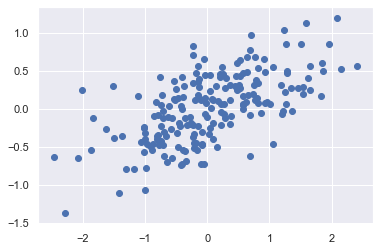

In [10]:
plt.scatter(X[:, 0], X[:, 1])
#plt.axis('equal');

In [9]:
# PCA as dimensionality reduction
# Using PCA for dimensionality reduction involves zeroing out one or more of the 
# smallest principal components, resulting in a lower-dimensional projection of the data that 
# preserves the maximal data variance.

In [11]:
pca = PCA(n_components=1)

pca.fit(X)

X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 4)
transformed shape: (200, 1)


In [24]:
# The transformed data has been reduced to a single dimension. 
# To understand the effect of this dimensionality reduction, we can perform the 
# inverse transform of this reduced data and plot it along with the original data:

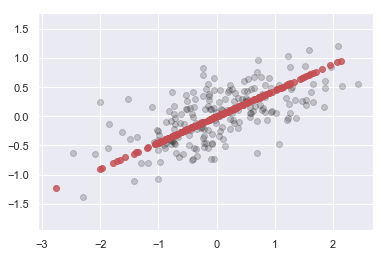

In [11]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='k')

plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')

plt.axis('equal');

In [47]:
# The light points are the original data, while the dark points are the projected version. 

# This makes clear what a PCA dimensionality reduction means: the information along the least 
# important principal axis or axes is removed, leaving only the component(s) of the data 
# with the highest variance. 

# The fraction of variance that is cut out (proportional to the 
# spread of points about the line formed in this figure) is roughly a measure of how much 
# "information" is discarded in this reduction of dimensionality.

In [48]:
# This reduced-dimension dataset is in some senses "good enough" to encode the most 
# important relationships between the points: despite reducing the dimension of the data by 50%, 
# the overall relationship between the data points are mostly preserved.